In [1]:
"""
# Analyzing Poverty in Honduras

In this notebook, we will analyze the poverty levels in Honduras using multiple indicators such as economic growth, tourism, education spending, and more. We aim to develop a predictive model to estimate the "Share below $1 a day" based on these indicators.
"""

'\n# Analyzing Poverty in Honduras\n\nIn this notebook, we will analyze the poverty levels in Honduras using multiple indicators such as economic growth, tourism, education spending, and more. We aim to develop a predictive model to estimate the "Share below $1 a day" based on these indicators.\n'

In [2]:
import pandas as pd

# Load and merge datasets

datasets = {
    "poverty": r'C:\Users\JFB\Documents\Pythoncsv\Personal\populationinpoverty.csv',
    "economy": r'C:\Users\JFB\Documents\Pythoncsv\Personal\economicgrowth.csv',
    "tourism": r'C:\Users\JFB\Documents\Pythoncsv\Personal\tourismtrips.csv',
    "education": r'C:\Users\JFB\Documents\Pythoncsv\Personal\educationspending.csv',
    "homicides": r'C:\Users\JFB\Documents\Pythoncsv\Personal\homicides.csv',
    "electricity": r'C:\Users\JFB\Documents\Pythoncsv\Personal\electricityaccess.csv',
    "electricityaccess": r'C:\Users\JFB\Documents\Pythoncsv\Personal\accesstoelectricity.csv',
    "agricultural": r'C:\Users\JFB\Documents\Pythoncsv\Personal\agriculturalland.csv',
    "govspending": r'C:\Users\JFB\Documents\Pythoncsv\Personal\gdpgovexpenditure.csv',
    "healthspend": r'C:\Users\JFB\Documents\Pythoncsv\Personal\healthspending.csv',
    "internetuse": r'C:\Users\JFB\Documents\Pythoncsv\Personal\internetuse.csv',
    "undernourishment": r'C:\Users\JFB\Documents\Pythoncsv\Personal\prevalenceofundernourishment.csv',
    "renewables": r'C:\Users\JFB\Documents\Pythoncsv\Personal\renewableelectricity.csv',
    "socspending": r'C:\Users\JFB\Documents\Pythoncsv\Personal\socialspending.csv'
}

honduras_data = pd.read_csv(datasets["poverty"])
honduras_data = honduras_data[honduras_data['Entity'] == 'Honduras']

for key, csv_path in datasets.items():
    if key != "poverty":
        temp_data = pd.read_csv(csv_path)
        temp_data = temp_data[temp_data['Entity'] == 'Honduras']
        honduras_data = honduras_data.merge(temp_data, on=['Year', 'Entity'], how='outer')

honduras_data.head()

,Entity,Year,Share below $1 a day,Share below $2.15 a day,GDP per capita,tourists,education spending,homicides,urban access to electricity percentage,rural access to electricity percentage,access to electricity,Agricultural land hectares,Expense (% of GDP),health spending,Individuals using the Internet (% of population),Prevalence of undernourishment (% of population),Renewable electricity share,Social Expenditure GDP Percentage
0,Honduras,1989,16.559424,39.959561,3166.6462,NaN,NaN,NaN,NaN,NaN,NaN,3371000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Honduras,1990,18.560977,41.997452,3253.6936,NaN,NaN,495.53280,NaN,NaN,NaN,3320000.0,NaN,NaN,0.0,NaN,NaN,NaN
2,Honduras,1991,9.142681,30.774723,3317.5164,NaN,NaN,703.79320,88.700620,31.257088,54.781937,3342000.0,NaN,NaN,0.0,NaN,NaN,NaN
3,Honduras,1992,6.505092,26.968343,3328.1123,NaN,NaN,955.10614,89.851265,37.012500,58.913113,3355000.0,NaN,NaN,0.0,NaN,NaN,NaN
4,Honduras,1993,5.668213,21.429638,3499.3900,NaN,NaN,1252.52270,92.082520,38.717102,61.100155,3548000.0,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
honduras_data = honduras_data.dropna()  # handle NaN values by dropping them; adjust as necessary

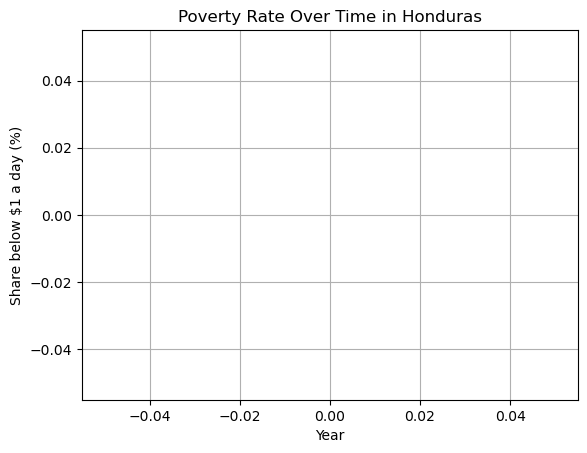

In [4]:
import matplotlib.pyplot as plt

plt.plot(honduras_data['Year'], honduras_data['Share below $1 a day'])
plt.title('Poverty Rate Over Time in Honduras')
plt.xlabel('Year')
plt.ylabel('Share below $1 a day (%)')
plt.grid(True)
plt.show()

In [5]:
factors = ['access to electricity', 'Agricultural land hectares', 'GDP per capita', 'education spending', 'Expense (% of GDP)', 'health spending', 'homicides', 'Individuals using the Internet (% of population)', 'Prevalence of undernourishment (% of population)', 'Renewable electricity share', 'Social Expenditure GDP Percentage', 'tourists'  ] 

In [6]:
correlations = honduras_data[factors + ['Share below $1 a day']].corr()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


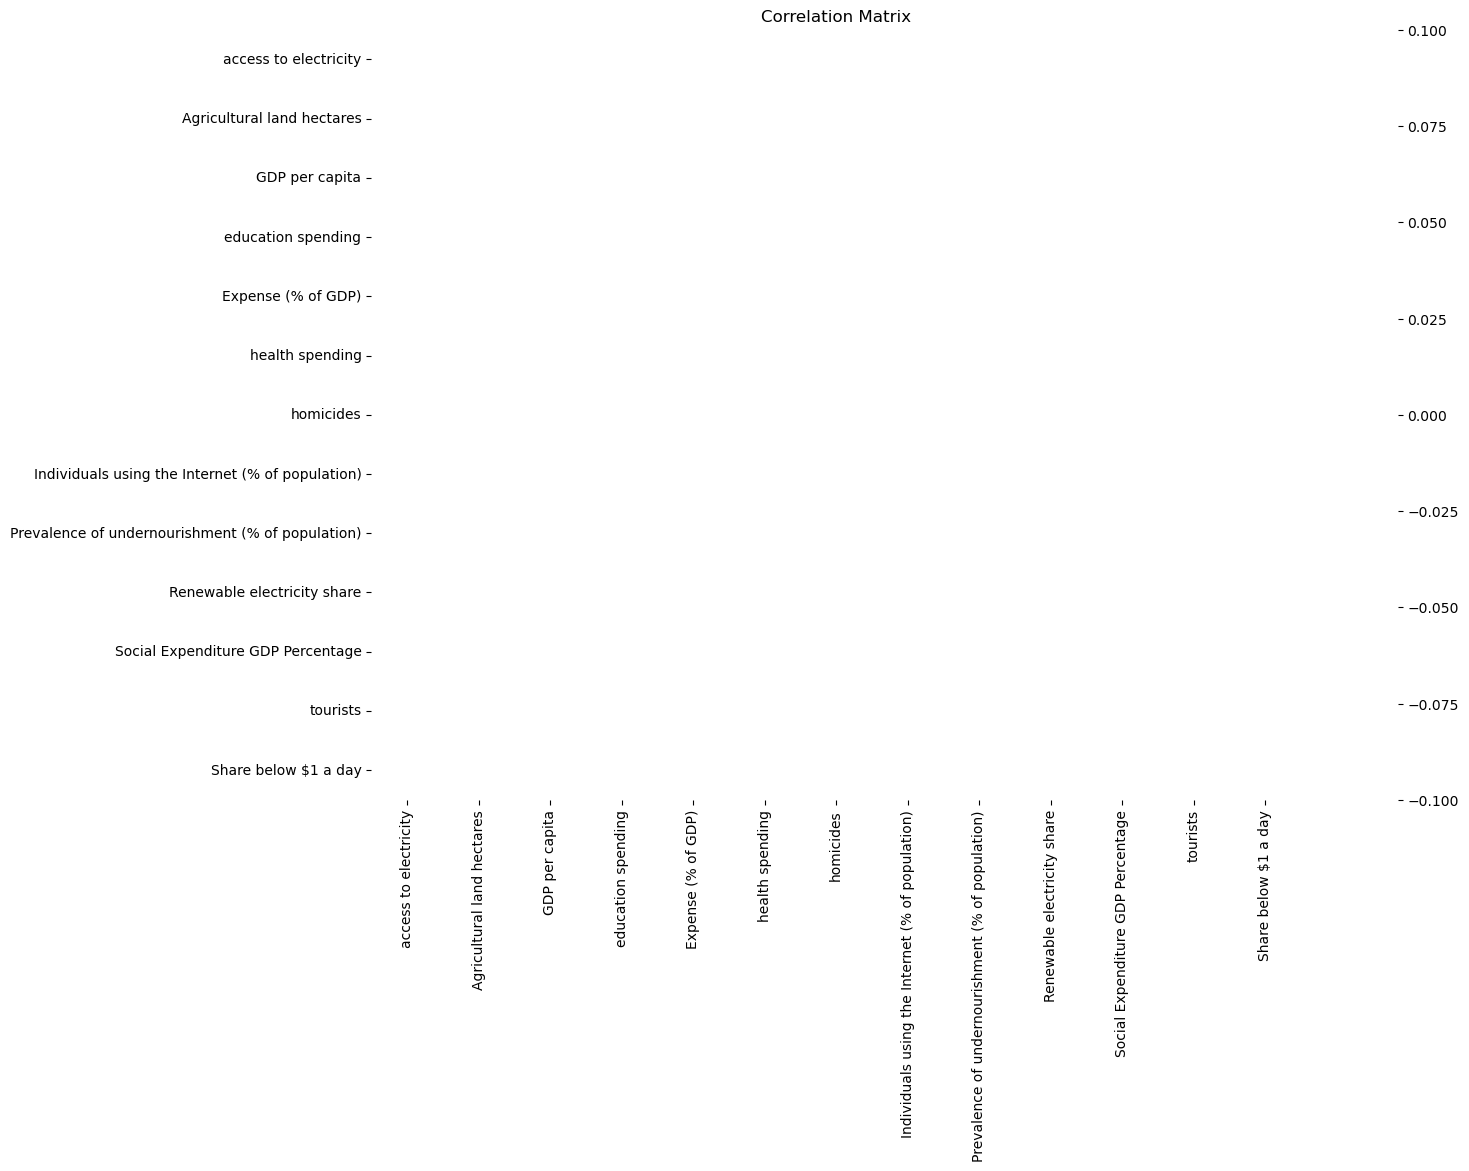

In [7]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = honduras_data[factors]
y = honduras_data['Share below $1 a day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")